In [ ]:
!pip install webdriver-manager
import os
import csv
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager # This line should now work
from PIL import Image
from io import BytesIO

In [ ]:
!pip install selenium

# **Question-D**

Fetching past data for Mumbai
Fetching past data for Delhi
Fetching past data for Bangalore
Fetching past data for Hyderabad
Fetching past data for Ahmedabad
Fetching past data for Chennai
Fetching past data for Kolkata
Fetching past data for Pune
Fetching past data for Jaipur
Fetching past data for Lucknow
Fetching past data for Kanpur
Fetching past data for Nagpur
Fetching past data for Indore
Fetching past data for Thane
Fetching past data for Bhopal
Fetching past data for Visakhapatnam
Fetching past data for Patna
Fetching past data for Vadodara
Fetching past data for Ghaziabad
Fetching past data for Ludhiana
Data collection complete. CSV file saved.


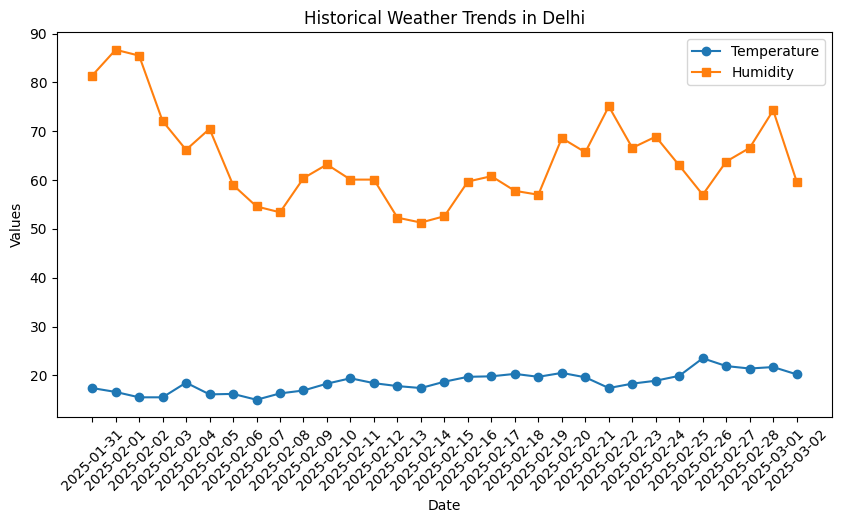

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Virtual Crossing API setup
API_KEY = "M2ZF4PZRN7LGJSFC4HX2E5PQ2"  # Replace with your actual API key
BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"

# List of 20 Indian cities with their latitude and longitude
cities = [
    "Mumbai", "Delhi", "Bangalore", "Hyderabad", "Ahmedabad", "Chennai", "Kolkata",
    "Pune", "Jaipur", "Lucknow", "Kanpur", "Nagpur", "Indore", "Thane", "Bhopal",
    "Visakhapatnam", "Patna", "Vadodara", "Ghaziabad", "Ludhiana"
]

# Function to fetch past weather data
def fetch_historical_weather(city):
    url = f"{BASE_URL}{city}/last30days?unitGroup=metric&key={API_KEY}&contentType=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        records = []
        for day in data.get("days", []):
            records.append({
                "Date": day["datetime"],
                "City": city,
                "Temperature (C)": day["temp"],
                "Humidity (%)": day["humidity"],
                "Wind Speed (m/s)": day["windspeed"]
            })
        return records
    return []

# Collecting weather data for the past 30 days
data = []
for city in cities:
    print(f"Fetching past data for {city}")
    data.extend(fetch_historical_weather(city))

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv("india_historical_weather.csv", index=False)
print("Data collection complete. CSV file saved.")

# Visualizing trends for a sample city
sample_city = "Delhi"
df_city = df[df["City"] == sample_city]
plt.figure(figsize=(10,5))
plt.plot(df_city["Date"], df_city["Temperature (C)"], label="Temperature", marker='o')
plt.plot(df_city["Date"], df_city["Humidity (%)"], label="Humidity", marker='s')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title(f"Historical Weather Trends in {sample_city}")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# **Question-C**

In [ ]:
import os
import subprocess
import time
import csv
from datetime import datetime

stream_url = "https://cast3.asurahosting.com/proxy/santhar1/stream"

output_base = r"C:\Users\ravit\OneDrive\Desktop\PYTHON"

ffmpeg_path = r"C:\Users\ravit\Downloads\ffmpeg-7.1-essentials_build\ffmpeg-7.1-essentials_build\bin\ffmpeg.exe"

metadata_file = os.path.join(output_base, "audio_metadata.csv")

station_name = "Santhar Radio"

os.makedirs(output_base, exist_ok=True)

if not os.path.exists(metadata_file):
    with open(metadata_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Station Name", "Timestamp", "Duration (seconds)"])

for i in range(1, 33):
    output_file = os.path.join(output_base, f"clip_telugu_{i}.wav")

    command = [
        ffmpeg_path,
        "-y",
        "-i", stream_url,
        "-t", "40",
        "-c:a", "pcm_s16le",
        "-ar", "44100",
        "-ac", "2",
        output_file
    ]

    try:
        subprocess.run(command, check=True)
        print(f"✅ Audio clip saved at: {output_file}")

        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        duration = 40

        with open(metadata_file, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([station_name, timestamp, duration])

        print(f"📜 Metadata saved for: {output_file}")

    except subprocess.CalledProcessError as e:
        print(f"❌ FFmpeg error: {e}")
    except FileNotFoundError:
        print("❌ FFmpeg not found. Ensure it is installed and the path is correct.")

    if i < 33:
        print("⏳ Waiting for 2 minutes before the next recording...")
        time.sleep(60)

MessageError: Error: credential propagation was unsuccessful

# **Question-E**

In [ ]:
import pandas as pd

file_path = "/content/NCRB_Table_1C.2.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Sl. No.                                                  39 non-null     object
 1   Category                                                 39 non-null     object
 2   State/UT                                                 39 non-null     object
 3   Murder (Sec.302 IPC)                                     39 non-null     int64 
 4   Culpable Homicide not amounting to Murder (Sec.304 IPC)  39 non-null     int64 
 5   Infanticide (Sec.315 IPC)                                39 non-null     int64 
 6   Foeticide (Sec.316 IPC)                                  39 non-null     int64 
 7   Dowry Deaths (Sec.304B IPC)                              39 non-null     int64 
 8   Attempt to Commit Murder (Sec.307 IPC)    

In [ ]:
df.drop(columns=['Sl. No.'], inplace=True)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Missing Values:\n", df.isnull().sum())


Missing Values:
 category                                                   0
state/ut                                                   0
murder_(sec.302_ipc)                                       0
culpable_homicide_not_amounting_to_murder_(sec.304_ipc)    0
infanticide_(sec.315_ipc)                                  0
foeticide_(sec.316_ipc)                                    0
dowry_deaths_(sec.304b_ipc)                                0
attempt_to_commit_murder_(sec.307_ipc)                     0
attempt_to_commit_culpable_homicide_(sec.308_ipc)          0
grievous_hurt_(sec_325,_326,_326a_&_326b_ipc)              0
kidnapping_and_abduction_(sec_363-369_ipc)                 0
rape_(sec.376_ipc)                                         0
attempt_to_commit_rape_(sec.376_r/w_511_ipc)               0
rioting_(sec_147-151_&_153a_ipc)                           0
robbery_(sec_392_to_394_ipc)                               0
dacoity_(sec_395_to_398_ipc)                               0
arson_(

<ipython-input-7-0018b09f1177>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_sorted, y='state/ut', x='total_violent_crimes_(cols.3_to_17)', palette='coolwarm', orient='h')


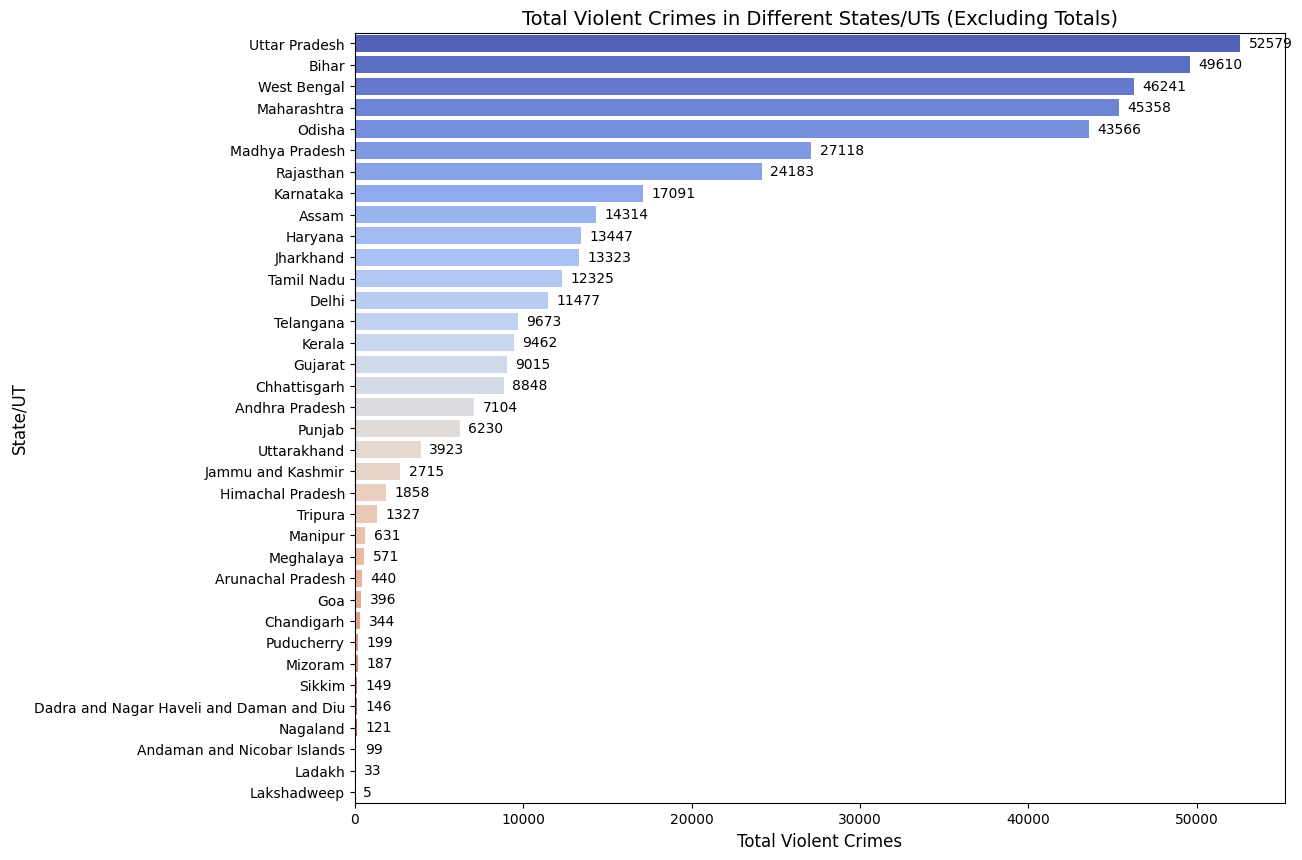

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Removing "Total (All India)" and "Total (States)" rows
df_filtered = df[~df['state/ut'].str.contains("Total", case=False, na=False)]

# Sorting data in decreasing order
df_sorted = df_filtered.sort_values(by='total_violent_crimes_(cols.3_to_17)', ascending=False)

# Plotting horizontal bar plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=df_sorted, y='state/ut', x='total_violent_crimes_(cols.3_to_17)', palette='coolwarm', orient='h')

# Annotating bars with values
for index, value in enumerate(df_sorted['total_violent_crimes_(cols.3_to_17)']):
    ax.text(value + 500, index, str(value), va='center', fontsize=10)

plt.title("Total Violent Crimes in Different States/UTs (Excluding Totals)", fontsize=14)
plt.xlabel("Total Violent Crimes", fontsize=12)
plt.ylabel("State/UT", fontsize=12)
plt.show()


<ipython-input-11-6806645c1a1d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=short_labels, y=crime_totals.values, palette='viridis')


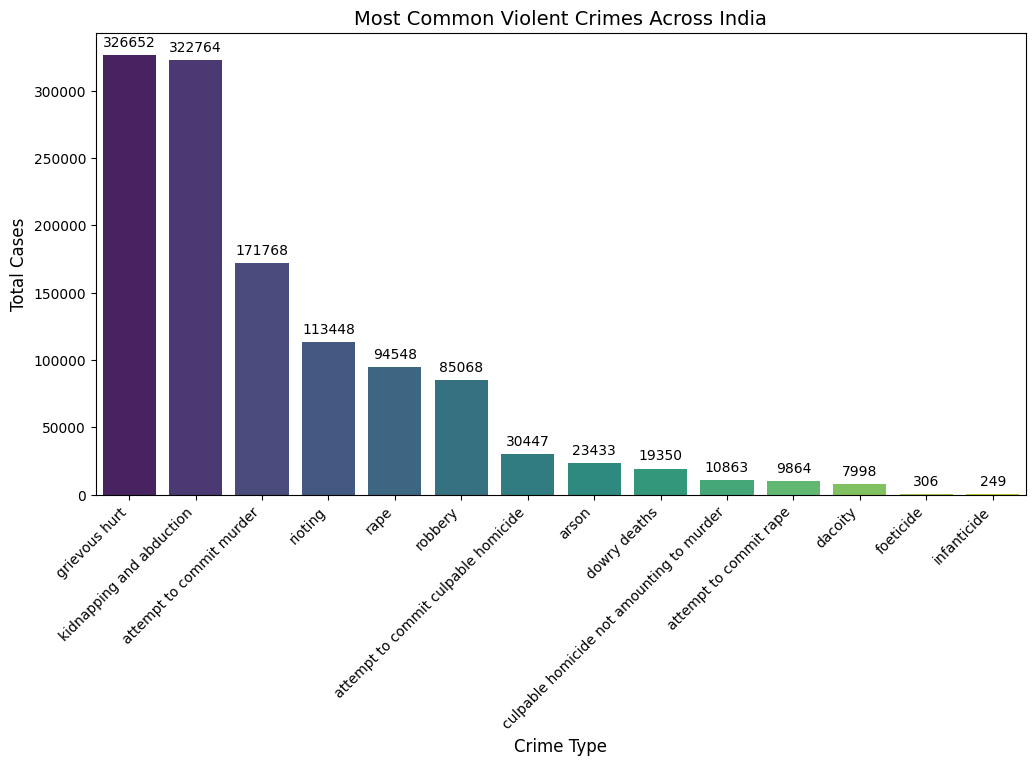

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting crime columns and calculating totals
crime_columns = df.columns[3:-1]  # Excluding 'state/ut' and 'total_violent_crimes'
crime_totals = df[crime_columns].sum().sort_values(ascending=False)

# Creating shorter labels for crime types
short_labels = [col.replace('_', ' ').split('(')[0].strip() for col in crime_totals.index]

# Plotting bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=short_labels, y=crime_totals.values, palette='viridis')

# Annotating bars with values with increased gap
for index, value in enumerate(crime_totals.values):
    ax.text(index, value + (0.02 * max(crime_totals.values)), str(value), ha='center', fontsize=10)

# Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.title("Most Common Violent Crimes Across India", fontsize=14)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.show()


<ipython-input-13-52c61407b82f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_states, x='state/ut', y='total_violent_crimes_(cols.3_to_17)', palette='Reds')


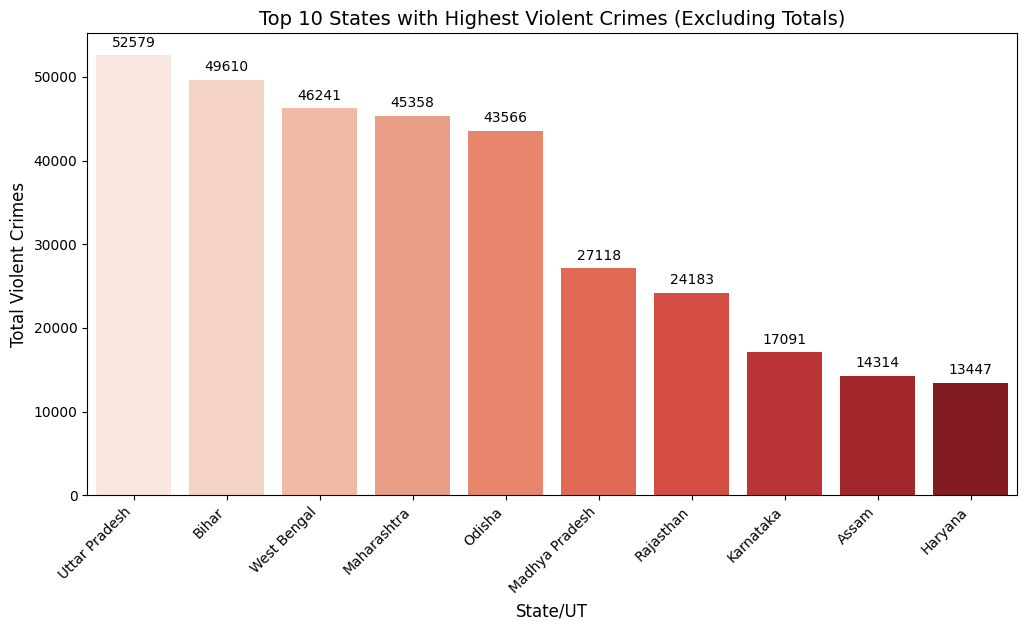

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Removing "Total (All India)" and "Total (States)" rows
df_filtered = df[~df['state/ut'].str.contains("Total", case=False, na=False)]

# Selecting top 10 states with highest violent crimes
top_10_states = df_filtered.nlargest(10, 'total_violent_crimes_(cols.3_to_17)')

# Plotting bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10_states, x='state/ut', y='total_violent_crimes_(cols.3_to_17)', palette='Reds')

# Annotating bars with values
for index, value in enumerate(top_10_states['total_violent_crimes_(cols.3_to_17)']):
    ax.text(index, value + (0.02 * max(top_10_states['total_violent_crimes_(cols.3_to_17)'])), str(value), ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 States with Highest Violent Crimes (Excluding Totals)", fontsize=14)
plt.xlabel("State/UT", fontsize=12)
plt.ylabel("Total Violent Crimes", fontsize=12)
plt.show()


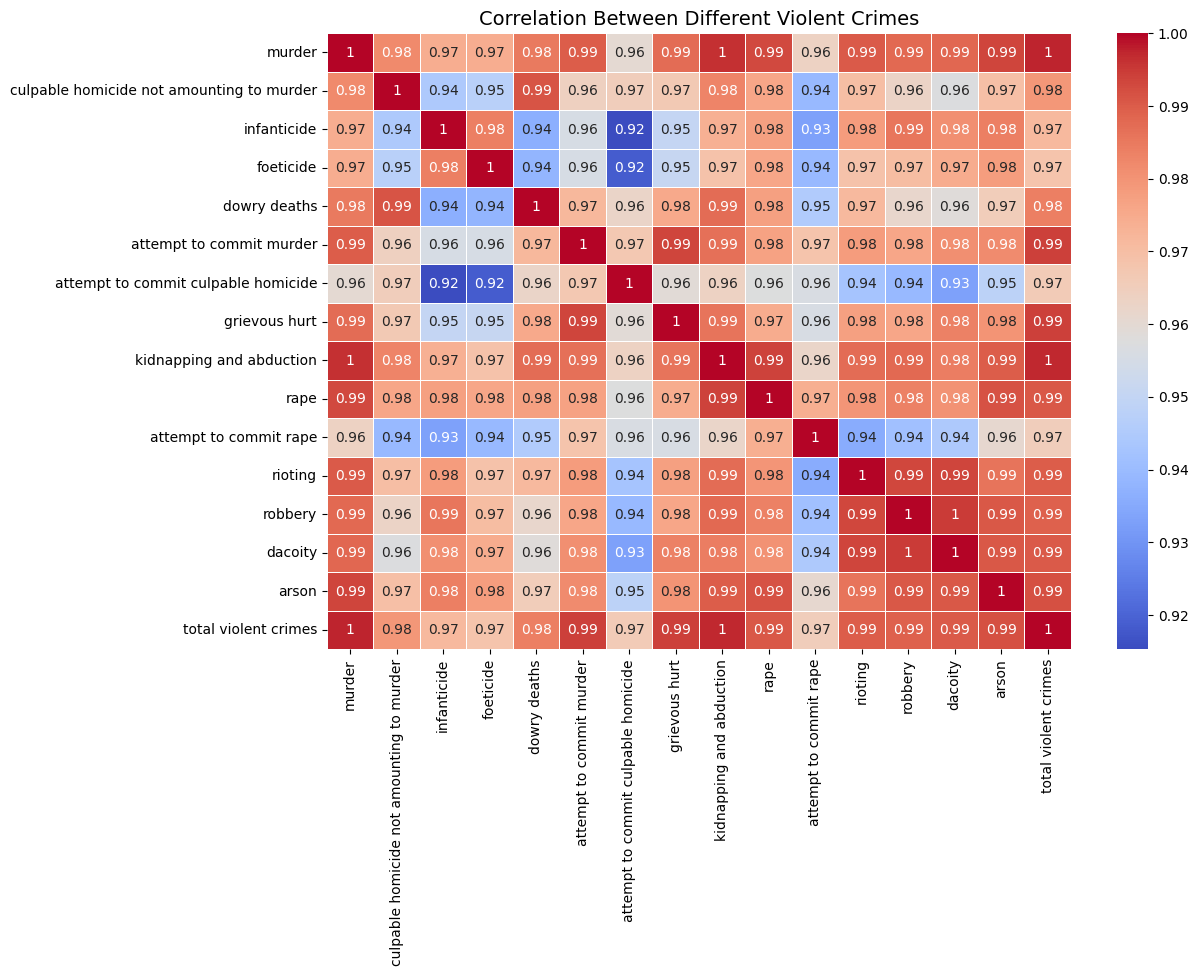

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating shorter column names
short_col_names = {col: col.replace('_', ' ').split('(')[0].strip() for col in df.columns[2:]}
df_renamed = df.rename(columns=short_col_names)

# Plotting heatmap with shorter names
plt.figure(figsize=(12, 8))
sns.heatmap(df_renamed.iloc[:, 2:].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Between Different Violent Crimes", fontsize=14)
plt.show()


# **Question-A**

In [ ]:
labels = [
    "Cats", "Dogs", "Birds", "Cars", "Bikes", "Flowers", "Mountains", "Rivers", "Buildings", "Fruits",
    "Vegetables", "Clothes", "Shoes", "Watches", "Phones", "Laptops", "Books", "Food", "Furniture", "Sports"
]

In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 19.9 MB/s eta 0:00:00


In [ ]:
!pkill -9 chrome
!pkill -9 chromedriver


In [ ]:
import os
import time
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from PIL import Image

from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-data-dir=/tmp/new_chrome_profile")  # Use a unique directory

driver = webdriver.Chrome(options=chrome_options)


dataset_path = "image_dataset"
os.makedirs(dataset_path, exist_ok=True)

metadata = []

def download_image(url,folder,filename):
        try:
                response = requests.get(url,timeout=5)
                if response.status_code == 200:
                        filepath = os.path.join(folder,filename)
                        with open(filepath, 'wb') as f:
                                f.write(response.content)

                        with Image.open(filepath) as img:
                                width, height = img.size
                                return filepath, width, height

        except Exception as e:
                print(e)
        return None, None, None

for label in labels:
        folder_path = os.path.join(dataset_path,label)
        os.makedirs(folder_path, exist_ok=True)

        search_url = f"https://www.google.com/search?q={label}+photo+-stock+-clipart&tbm=isch&tbs=isz:l"
        driver.get(search_url)
        time.sleep(2)

        body = driver.find_element(By.TAG_NAME, 'body')
        for _ in range(10):
                body.send_keys(Keys.PAGE_DOWN)
                time.sleep(4)

        images = driver.find_elements(By.CSS_SELECTOR, 'img')
        count = 0

        for img in images:
                if count>=50:
                        break
                src = img.get_attribute('src')
                if src and "http" in src:
                        filename = f"{label}_{count+1}.jpg"
                        filepath, width, height = download_image(src,folder_path,filename)
                        if filepath:
                                metadata.append([label,src,filepath,width,height])
                                count += 1

df = pd.DataFrame(metadata, columns=["label","url","filepath","width","height"])
df.to_csv(os.path.join(dataset_path,"image_metadata.csv"), index=False)

driver.quit()
print("Downloaded images successfully")

cannot identify image file 'image_dataset/Cats/Cats_2.jpg'
cannot identify image file 'image_dataset/Dogs/Dogs_2.jpg'
cannot identify image file 'image_dataset/Birds/Birds_2.jpg'
cannot identify image file 'image_dataset/Cars/Cars_3.jpg'
cannot identify image file 'image_dataset/Bikes/Bikes_2.jpg'
cannot identify image file 'image_dataset/Flowers/Flowers_2.jpg'
cannot identify image file 'image_dataset/Mountains/Mountains_2.jpg'
cannot identify image file 'image_dataset/Rivers/Rivers_2.jpg'
cannot identify image file 'image_dataset/Buildings/Buildings_1.jpg'
cannot identify image file 'image_dataset/Fruits/Fruits_2.jpg'
cannot identify image file 'image_dataset/Vegetables/Vegetables_2.jpg'
cannot identify image file 'image_dataset/Clothes/Clothes_2.jpg'
cannot identify image file 'image_dataset/Shoes/Shoes_2.jpg'
cannot identify image file 'image_dataset/Watches/Watches_3.jpg'
cannot identify image file 'image_dataset/Phones/Phones_3.jpg'
cannot identify image file 'image_dataset/Lapto

# **Question-B**

In [ ]:
categories = {
    "Technology": [
        "https://techcrunch.com",
        "https://thenextweb.com",
        "https://www.wired.com"
    ],
    "Health": [
        "https://www.medicalnewstoday.com",
        "https://www.healthline.com",
        "https://www.webmd.com"
    ],
    "Sports": [
        "https://www.espn.com",
        "https://www.bbc.com/sport",
        "https://www.sportskeeda.com"
    ],
    "Finance": [
        "https://www.investopedia.com",
        "https://www.forbes.com",
        "https://www.bloomberg.com"
    ],
    "Science": [
        "https://www.sciencenews.org",
        "https://www.scientificamerican.com",
        "https://www.nature.com"
    ],
    "Entertainment": [
        "https://www.hollywoodreporter.com",
        "https://www.variety.com",
        "https://www.rottentomatoes.com"
    ],
    "Politics": [
        "https://www.politico.com",
        "https://www.nbcnews.com/politics",
        "https://www.reuters.com/politics"
    ],
    "Education": [
        "https://www.edutopia.org",
        "https://www.timeshighereducation.com",
        "https://www.theguardian.com/education"
    ],
    "Travel": [
        "https://www.lonelyplanet.com",
        "https://www.travelandleisure.com",
        "https://www.nationalgeographic.com/travel"
    ],
    "Gaming": [
        "https://www.pcgamer.com",
        "https://www.ign.com",
        "https://www.gamespot.com"
    ],
    "Automobile": [
        "https://www.caranddriver.com",
        "https://www.motortrend.com",
        "https://www.autoblog.com"
    ],
    "Fashion": [
        "https://www.vogue.com",
        "https://www.elle.com",
        "https://www.gq.com"
    ],
    "Food": [
        "https://www.bonappetit.com",
        "https://www.foodnetwork.com",
        "https://www.epicurious.com"
    ],
    "Cryptocurrency": [
        "https://www.coindesk.com",
        "https://cointelegraph.com",
        "https://www.cryptoslate.com"
    ],
    "History": [
        "https://www.history.com",
        "https://www.bbc.co.uk/history",
        "https://www.smithsonianmag.com/history"
    ],
    "Environment": [
        "https://www.nationalgeographic.com/environment",
        "https://www.sciencedaily.com/news/earth_climate",
        "https://www.worldwildlife.org"
    ],
    "Movies": [
        "https://www.imdb.com",
        "https://www.boxofficemojo.com",
        "https://www.fandango.com"
    ],
    "Artificial Intelligence": [
        "https://www.analyticsvidhya.com",
        "https://www.aitrends.com",
        "https://www.deepmind.com"
    ],
    "Cybersecurity": [
        "https://www.darkreading.com",
        "https://www.csoonline.com",
        "https://www.bleepingcomputer.com"
    ],
    "Business": [
        "https://www.wsj.com",
        "https://www.businessinsider.com",
        "https://hbr.org"
    ]
}


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# nltk.download('punkt')
# nltk.download('stopwords')

# Create a directory to store the text files
os.makedirs("scraped_data", exist_ok=True)

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    words = [word for word in words if word not in stopwords.words('english') and word.isalnum()]  # Remove stopwords
    return ' '.join(words)

def scrape_and_save(category, urls):
    all_text = ""
    for url in urls:
        try:
            response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, "html.parser")
                articles = soup.find_all(["h1", "h2", "h3", "p"])  # Extract headings and paragraphs
                for article in articles:
                    all_text += article.get_text(separator=" ") + "\n"
        except Exception as e:
            print(f"Error scraping {url}: {e}")

    cleaned_text = clean_text(all_text)
    file_path = os.path.join("scraped_data", f"{category}.txt")

    with open(file_path, "w", encoding="utf-8") as f:
        f.write(cleaned_text)

    print(f"Data saved for category: {category}")

# Iterate over categories and scrape data
for category, urls in categories.items():
    scrape_and_save(category, urls)


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import re
from datetime import datetime

# Create directory for output
os.makedirs("scraped_data", exist_ok=True)

def extract_date(soup):
    """Extract article date from meta tags."""
    date_tags = ["article:published_time", "date", "publish-date", "pubdate"]
    for tag in date_tags:
        date_meta = soup.find("meta", {"property": tag}) or soup.find("meta", {"name": tag})
        if date_meta and date_meta.get("content"):
            return date_meta["content"]
    return datetime.today().strftime("%Y-%m-%d")  # Default to today's date

def clean_text(text):
    """Cleans text by removing unnecessary spaces and line breaks."""
    text = re.sub(r"\s+", " ", text)  # Normalize whitespace
    return text.strip()

def scrape_and_save(category, urls):
    structured_data = []

    for url in urls:
        try:
            response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, "html.parser")

            title = soup.title.string.strip() if soup.title else "Untitled Article"
            date = extract_date(soup)
            paragraphs = [p.get_text(strip=True) for p in soup.find_all("p")]
            content = "\n".join(paragraphs)

            structured_data.append(f"=== {title} ===\nDate: {date}\nSource: {url}\n--------------------\n{clean_text(content)}\n\n")

        except requests.RequestException as e:
            print(f"Error scraping {url}: {e}")

    file_path = os.path.join("scraped_data", f"{category}111.txt")
    with open(file_path, "w", encoding="utf-8") as f:
        f.writelines(structured_data)

    print(f"Structured data saved for category: {category}")



# Scrape data
for category, urls in categories.items():
    scrape_and_save(category, urls)


# **TASK-3**

In [ ]:
import os
import requests
import csv
from bs4 import BeautifulSoup

dataset_folder = "national_data"
flags_folder = os.path.join(dataset_folder, "flags")
anthems_folder = os.path.join(dataset_folder, "anthems")
music_folder = os.path.join(dataset_folder, "anthems_mp3")

os.makedirs(flags_folder, exist_ok=True)
os.makedirs(anthems_folder, exist_ok=True)
os.makedirs(music_folder, exist_ok=True)

In [ ]:
countries = {
    "US": "United States", "IN": "India", "GB": "United Kingdom", "FR": "France", "DE": "Germany",
    "JP": "Japan", "CN": "China", "BR": "Brazil", "ZA": "South Africa", "RU": "Russia",
    "AU": "Australia", "CA": "Canada", "IT": "Italy", "ES": "Spain", "MX": "Mexico",
    "KR": "South Korea", "ID": "Indonesia", "NL": "Netherlands", "SA": "Saudi Arabia", "TR": "Turkey",
    "AR": "Argentina", "CH": "Switzerland", "SE": "Sweden", "NG": "Nigeria", "PL": "Poland",
    "BE": "Belgium", "TH": "Thailand", "IR": "Iran", "AT": "Austria", "PK": "Pakistan",
    "MY": "Malaysia", "PH": "Philippines", "SG": "Singapore", "CO": "Colombia", "BD": "Bangladesh",
    "VN": "Vietnam", "AE": "United Arab Emirates", "GR": "Greece", "UA": "Ukraine", "HK": "Hong Kong",
    "IL": "Israel", "NO": "Norway", "FI": "Finland", "DK": "Denmark", "CL": "Chile",
    "CZ": "Czech Republic", "PT": "Portugal", "RO": "Romania", "HU": "Hungary", "NZ": "New Zealand",
    "IE": "Ireland", "PE": "Peru", "KE": "Kenya", "VE": "Venezuela", "EC": "Ecuador",
    "DZ": "Algeria", "MA": "Morocco", "EG": "Egypt", "GH": "Ghana", "SK": "Slovakia",
    "BG": "Bulgaria", "HR": "Croatia", "LT": "Lithuania", "SI": "Slovenia", "LV": "Latvia",
    "EE": "Estonia", "SR": "Serbia", "BO": "Bolivia", "TT": "Trinidad and Tobago", "KW": "Kuwait",
    "OM": "Oman", "CY": "Cyprus", "LU": "Luxembourg", "MT": "Malta", "PY": "Paraguay",
    "IS": "Iceland", "MU": "Mauritius", "QA": "Qatar", "PA": "Panama", "LK": "Sri Lanka",
    "BH": "Bahrain", "JM": "Jamaica", "DO": "Dominican Republic", "GT": "Guatemala", "UY": "Uruguay",
    "NP": "Nepal", "HN": "Honduras", "SV": "El Salvador", "BZ": "Belize", "MG": "Madagascar"
}

In [ ]:
flag_base_url = "https://flagcdn.com/w640/"
anthem_base_url = "https://nationalanthems.info/"

In [ ]:
csv_file = os.path.join(dataset_folder, "national_data.csv")

In [ ]:
data = []

In [ ]:
for code, country in countries.items():
    print(f"Processing: {country}")

    # Download flag image
    flag_url = f"{flag_base_url}{code.lower()}.png"
    flag_path = os.path.join(flags_folder, f"{code}.png")

    flag_downloaded = False
    try:
        response = requests.get(flag_url)
        if response.status_code == 200:
            with open(flag_path, "wb") as f:
                f.write(response.content)
            flag_downloaded = True
            print(f"✔ Flag saved: {flag_path}")
    except Exception as e:
        print(f"❌ Flag download failed for {country}: {e}")

    # Download anthem translation
    anthem_url = f"{anthem_base_url}{code.lower()}.htm"
    anthem_path = os.path.join(anthems_folder, f"{code}.txt")

    anthem_text = "N/A"
    anthem_downloaded = False
    try:
        response = requests.get(anthem_url)

        soup = BeautifulSoup(response.text, "html.parser")
        anthem_section = soup.find("div", class_="collapseomatic_content ")


        if anthem_section:
            anthem_text = anthem_section.get_text(strip=True)
            with open(anthem_path, "w", encoding="utf-8") as f:
                f.write(anthem_text)
            anthem_downloaded = True
            print(f"✔ Anthem saved: {anthem_path}")
    except Exception as e:
        print(f"❌ Anthem download failed for {country}: {e}")

    # Download anthem MP3
    mp3_url = f"{anthem_base_url}{code.lower()}.mp3"
    mp3_path = os.path.join(music_folder, f"{code}.mp3")

    mp3_downloaded = False
    try:
        response = requests.get(mp3_url)
        if response.status_code == 200:
            with open(mp3_path, "wb") as f:
                f.write(response.content)
            mp3_downloaded = True
            print(f"✔ MP3 saved: {mp3_path}")
    except Exception as e:
        print(f"❌ MP3 download failed for {country}: {e}")

    # Append data
    data.append([country, flag_path if flag_downloaded else "N/A", anthem_text if anthem_downloaded else "N/A", mp3_path if mp3_downloaded else "N/A"])

Processing: United States
✔ Flag saved: national_data/flags/US.png
<Response [406]>
Processing: India
✔ Flag saved: national_data/flags/IN.png
<Response [406]>
Processing: United Kingdom
✔ Flag saved: national_data/flags/GB.png
<Response [406]>
Processing: France
✔ Flag saved: national_data/flags/FR.png
<Response [406]>
Processing: Germany
✔ Flag saved: national_data/flags/DE.png
<Response [406]>
Processing: Japan
✔ Flag saved: national_data/flags/JP.png
<Response [406]>
Processing: China
✔ Flag saved: national_data/flags/CN.png
<Response [406]>
Processing: Brazil
✔ Flag saved: national_data/flags/BR.png
<Response [406]>
Processing: South Africa
✔ Flag saved: national_data/flags/ZA.png
<Response [406]>
Processing: Russia
✔ Flag saved: national_data/flags/RU.png
<Response [406]>
Processing: Australia
✔ Flag saved: national_data/flags/AU.png
<Response [406]>
Processing: Canada
✔ Flag saved: national_data/flags/CA.png
<Response [406]>
Processing: Italy
✔ Flag saved: national_data/flags/IT

In [ ]:
with open(csv_file, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Country", "Flag Path", "Anthem Translation", "MP3 Path"])
    writer.writerows(data)

print(f"\n✅ Data collection complete! CSV saved at: {csv_file}")


✅ Data collection complete! CSV saved at: national_data/national_data.csv
